# Chapter 10- Ex2: Glass.data
## Cho dữ liệu glass.data.txt
## Sử dụng thuật toán KNN để dự đoán loại kính dựa trên các thông tin được cung cấp
1. Đọc dữ liệu và gán cho biến data. Tiền xử lý dữ liệu (nếu cần)
2. Tạo inputs data với các cột trừ cột type of class, và outputs data với 1 cột là type of class
3. Từ inputs data và outputs data => Tạo X_train, X_test, y_train, y_test với tỷ lệ 70-30
4. Thực hiện KNN với X_train, y_train
5. Dự đoán y từ X_test => so sánh với y_test
6. Đánh giá mô hình => Nhận xét
7. Ghi mô hình (nếu mô hình tốt sau khi đánh giá)

## Attribute Information:
1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute) 
    + 1 - building_windows_float_processed 
    + 2 - building_windows_non_float_processed 
    + 3 - vehicle_windows_float_processed 
    + 4 - vehicle_windows_non_float_processed (none in this database) 
    + 5 - containers 
    + 6 - tableware 
    + 7 - headlamps

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

np.set_printoptions(suppress = True)

In [6]:
glass = pd.read_csv('Data/glass.data.txt', header = None, index_col= 0)
glass.columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type_of_glass']
glass = glass.reset_index(drop=True)
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [7]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             214 non-null    float64
 1   Na             214 non-null    float64
 2   Mg             214 non-null    float64
 3   Al             214 non-null    float64
 4   Si             214 non-null    float64
 5   K              214 non-null    float64
 6   Ca             214 non-null    float64
 7   Ba             214 non-null    float64
 8   Fe             214 non-null    float64
 9   Type_of_glass  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [9]:
glass['Type_of_glass'].value_counts()

Type_of_glass
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [30]:
x = glass.drop('Type_of_glass', axis = 1)

from sklearn.preprocessing import LabelEncoder
label_encd = LabelEncoder()
y = label_encd.fit_transform(glass['Type_of_glass'])

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

## <span style = 'color:yellow'> Build XGBoostClassifier

Accuracy on train set: 0.9122807017543859
Accuracy on test  set: 0.6976744186046512


Confusion matrix:
     1  2  3  5  6  7
1  16  2  1  0  0  0
2   1  9  0  0  1  1
3   5  1  0  0  0  0
5   0  0  0  1  0  0
6   0  0  0  1  0  0
7   0  0  0  0  0  4


Classification report:
               precision    recall  f1-score   support

           1       0.73      0.84      0.78        19
           2       0.75      0.75      0.75        12
           3       0.00      0.00      0.00         6
           5       0.50      1.00      0.67         1
           6       0.00      0.00      0.00         1
           7       0.80      1.00      0.89         4

    accuracy                           0.70        43
   macro avg       0.46      0.60      0.51        43
weighted avg       0.62      0.70      0.65        43



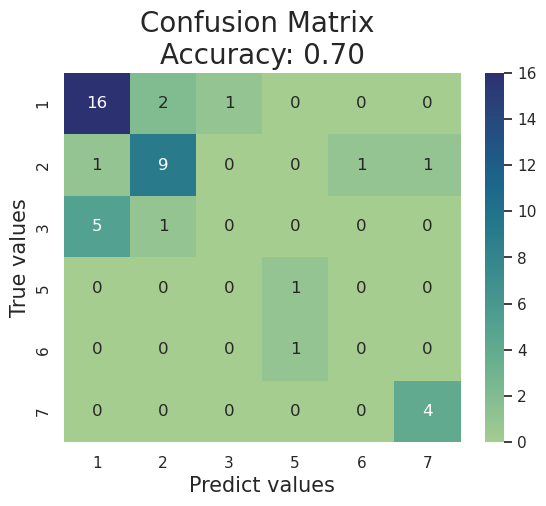

In [28]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report

xgb_clf = XGBClassifier(objective = 'multi:softmax',
                        num_class = 7,
                       min_child_weight = 10,
                       seed = 1)

xgb_clf.fit(x_train, y_train,
            verbose = False,
            eval_set = [(x_test, y_test)])

## Evaluation

y_test_pred = xgb_clf.predict(x_test)

print(f'Accuracy on train set: {xgb_clf.score(x_train, y_train)}')
print(f'Accuracy on test  set: {xgb_clf.score(x_test, y_test)}')
print()

labels = [str(label) for label in label_encd.classes_.tolist()]
cm_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred), index=labels, columns=labels)
print(f'\nConfusion matrix:\n {cm_df}')
print()
print(f'\nClassification report:\n {classification_report(y_test, y_test_pred, target_names=labels)}')

sbn.set_theme(style='darkgrid')
sbn.heatmap(cm_df, cmap='crest', annot=True, fmt='g')
plt.xlabel("Predict values", size=15)
plt.ylabel("True values", size=15)
plt.title(f'Confusion Matrix \nAccuracy: {xgb_clf.score(x_test, y_test):.2f}', size=20)

plt.show()

## <span style = 'color:yellow'> Apply GridSearchCV for Tunning Parameters

In [ ]:
x = glass.drop('Type_of_glass', axis = 1)

from sklearn.preprocessing import LabelEncoder
label_encd = LabelEncoder()
y = label_encd.fit_transform(glass['Type_of_glass'])

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

################

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report

param_grid = { 
    'n_estimators': [20, 40, 60, 80, 100, 150, 200],    
    'eta': [0.1, 0.15, 0.2, 0.25, 0.3],             
    'max_depth': [5, 10, 15, 20],                          
    'min_child_weight': [1, 5, 10, 15, 20],
    'gamma': [0, 1, 2, 3, 4, 5],
    'lambda': [1, 2, 3, 4, 5],
    'alpha': [1, 2, 3, 4, 5],
    'random_state': [1]
}

from datetime import datetime
from datetime import timedelta

start_time = datetime.now()

xgb_clf_gscv = GridSearchCV(estimator = XGBClassifier(device = 'cuda'), param_grid=param_grid, cv= 5)
xgb_clf_gscv.fit(x_train, y_train)

end_time = datetime.now()


dt = end_time - start_time
seconds = (dt.days * 24 * 60 * 60 + dt.seconds) 
print(f'Training and GridSearch time in second: {seconds}')

print(f'Best parameters for XGBoostClassifier: \n {gb_clf_gscv.best_params_}')


#################### Evaluation

y_test_pred = xgb_clf_gscv.predict(x_test)

print(f'Accuracy on train set: {xgb_clf_gscv.score(x_train, y_train)}')
print(f'Accuracy on test  set: {xgb_clf_gscv.score(x_test, y_test)}')
print()

labels = [str(label) for label in label_encd.classes_.tolist()]
cm_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred), index=labels, columns=labels)
print(f'\nConfusion matrix:\n {cm_df}')
print()
print(f'\nClassification report:\n {classification_report(y_test, y_test_pred, target_names=labels)}')

sbn.set_theme(style='darkgrid')
sbn.heatmap(cm_df, cmap='crest', annot=True, fmt='g')
plt.xlabel("Predict values", size=15)
plt.ylabel("True values", size=15)
plt.title(f'Confusion Matrix \nAccuracy: {xgb_clf_gscv.score(x_test, y_test):.2f}', size=20)

plt.show()